In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
#st.linregress(x, y) - выдает все нужыне параметры
df = pd.read_excel('1.xlsx')
df

,№,2011-2012,Объем денежных накоплений в РФ миллиард руб. (y),Сводные данные о продаже наличной иностранной валюты кредитными организациями физическим лицам (x1),Курс рубля к доллару США (x2),"Цена нефти марки ""Юралс"" (x3)","Динамика потребительских цен по группам товаров и услуг (месяц к соответствующему месяцу предыдущего года,%) (x4)"
0,1,январь,12345.0,2769,29.67,94.2,9.6
1,2,февраль,12091.9,3065,28.94,101.1,9.5
2,3,март,12339.7,3899,28.43,111.6,9.5
3,4,апрель,12450.6,3790,27.50,119.7,9.6
4,5,май,12832.1,3963,28.07,112.0,9.6
5,6,июнь,12892.1,4224,28.08,112.0,9.4
6,7,июль,13224.5,4645,27.68,115.3,9.0
7,8,август,13449.9,4914,28.86,109.6,8.2
8,9,сентябрь,13476.8,4830,31.88,112.6,7.2
9,10,октябрь,13588.9,4815,29.90,108.7,7.2


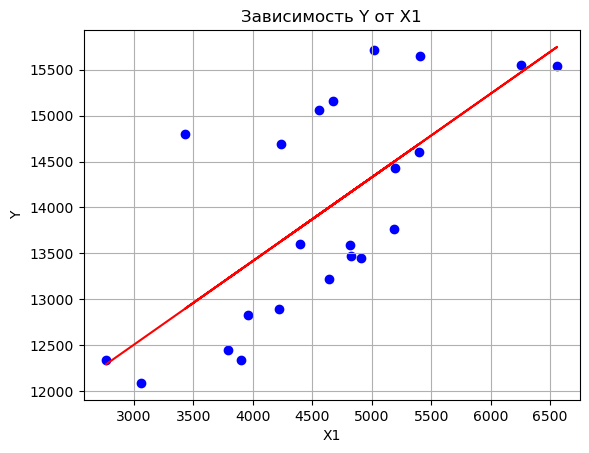

Корреляция = 0.7010969031711014

b1 = 0.9107692938575759
b0 = 9773.668590769114

var    1.437137e+06
std    1.198807e+03
Name: Объем денежных накоплений в РФ миллиард руб. (y), dtype: float64

slope, intercept, r_value, p_value, std_err= [0.910769293857573, 9773.668590769128, 0.7010969031711013, 0.00027811354554267676, 0.20713098375726044]
r^2= 0.4915368676361086


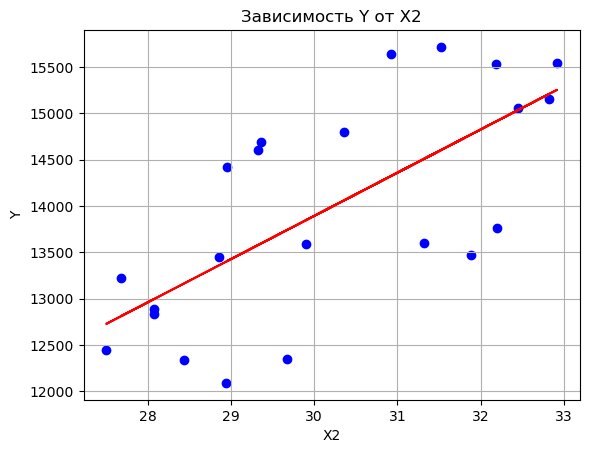

Корреляция = 0.6904541292945312

b1 = 466.1578594711153
b0 = -90.65352994358727

var    851603.826840
std       922.823833
Name: Сводные данные о продаже наличной иностранной валюты кредитными организациями физическим лицам (x1), dtype: float64

slope, intercept, r_value, p_value, std_err= [466.1578594711561, -90.65352994481873, 0.6904541292945311, 0.000375421299845758, 109.20622241495009]
r^2= 0.47672690465986906


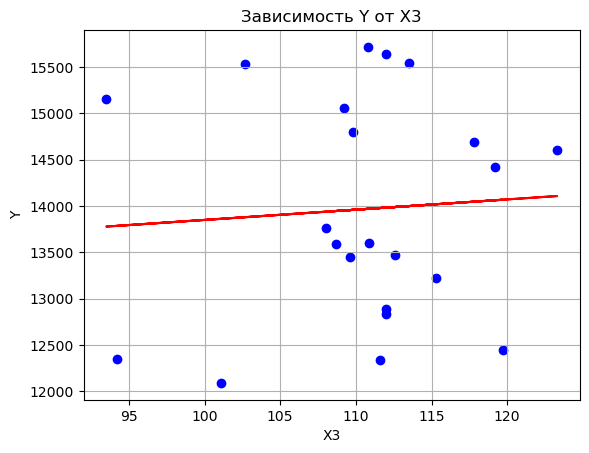

Корреляция = 0.06794970426595659

b1 = 11.065931335631078
b0 = 12744.252349216164

var    3.152840
std    1.775624
Name: Курс рубля к доллару США (x2), dtype: float64

slope, intercept, r_value, p_value, std_err= [11.06593133563923, 12744.252349215265, 0.06794970426595658, 0.7638295252203352, 36.33126139669021]
r^2= 0.004617162309830957


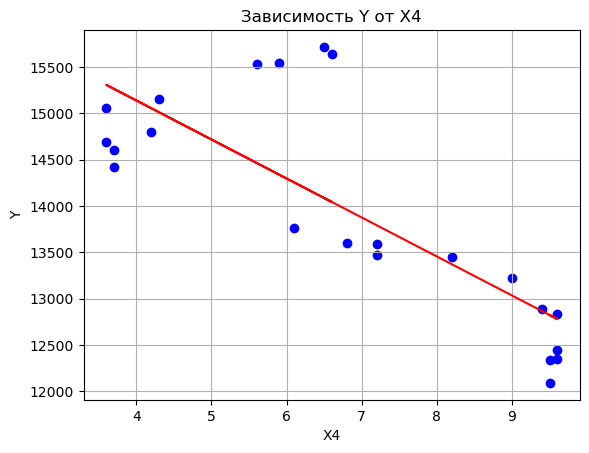

Корреляция = -0.794821826688968

b1 = -421.0239870176006
b0 = 16824.412893655892

var    54.187294
std     7.361202
Name: Цена нефти марки "Юралс" (x3), dtype: float64

slope, intercept, r_value, p_value, std_err= [-421.0239870175971, 16824.412893655866, -0.794821826688968, 9.916705456085586e-06, 71.8783845094427]
r^2= 0.6317417361811878


In [19]:
import matplotlib.pyplot as plt

factors = ['X1', 'X2', 'X3','X4']

for factor in range(len(factors)):
    x = np.array(df.iloc[:, factor+3])
    y = np.array(df.iloc[:, 2])
    n = np.size(x) 
    
    x_mean = np.mean(x) 
    y_mean = np.mean(y) 
    x_mean,y_mean 
    
    Sxy = np.sum(x*y) - n*x_mean*y_mean 
    Sxx = np.sum(x*x) - n*x_mean*x_mean 
    
    b1 = Sxy / Sxx 
    b0 = y_mean - b1*x_mean 
    y_pred = b1 * x + b0 
    plt.figure()
    # Создаем новую фигуру для каждой диаграммы   
    plt.scatter(df.iloc[:,(factor+3)], df.iloc[:,2],color='blue')
    plt.plot(x, y_pred, color = 'red') 
    plt.xlabel(factors[factor])
    plt.ylabel('Y')
    plt.title(f'Зависимость Y от {factors[factor]}')
    plt.grid(True)
    plt.show()
    print(f'Корреляция = {df.iloc[:,(factor+3)].corr( df.iloc[:,2])}')
    print()
    print('b1 =', b1) 
    print('b0 =', b0)
    print()
    print(df.iloc[:,2+factor].agg(['var','std']))
    print()
    print('slope, intercept, r_value, p_value, std_err= ',end='')
    print(list(st.linregress(x, y)))
    print('r^2= ',end='')
    print(float(list(st.linregress(x, y))[2])**2)
    
   
    

In [16]:
df.iloc[:,2:].corr()

,Объем денежных накоплений в РФ миллиард руб. (y),Сводные данные о продаже наличной иностранной валюты кредитными организациями физическим лицам (x1),Курс рубля к доллару США (x2),"Цена нефти марки ""Юралс"" (x3)","Динамика потребительских цен по группам товаров и услуг (месяц к соответствующему месяцу предыдущего года,%) (x4)"
Объем денежных накоплений в РФ миллиард руб. (y),1.000000,0.701097,0.690454,0.067950,-0.794822
Сводные данные о продаже наличной иностранной валюты кредитными организациями физическим лицам (x1),0.701097,1.000000,0.509960,0.255408,-0.460771
Курс рубля к доллару США (x2),0.690454,0.509960,1.000000,-0.385527,-0.560071
"Цена нефти марки ""Юралс"" (x3)",0.067950,0.255408,-0.385527,1.000000,-0.166677
"Динамика потребительских цен по группам товаров и услуг (месяц к соответствующему месяцу предыдущего года,%) (x4)",-0.794822,-0.460771,-0.560071,-0.166677,1.000000


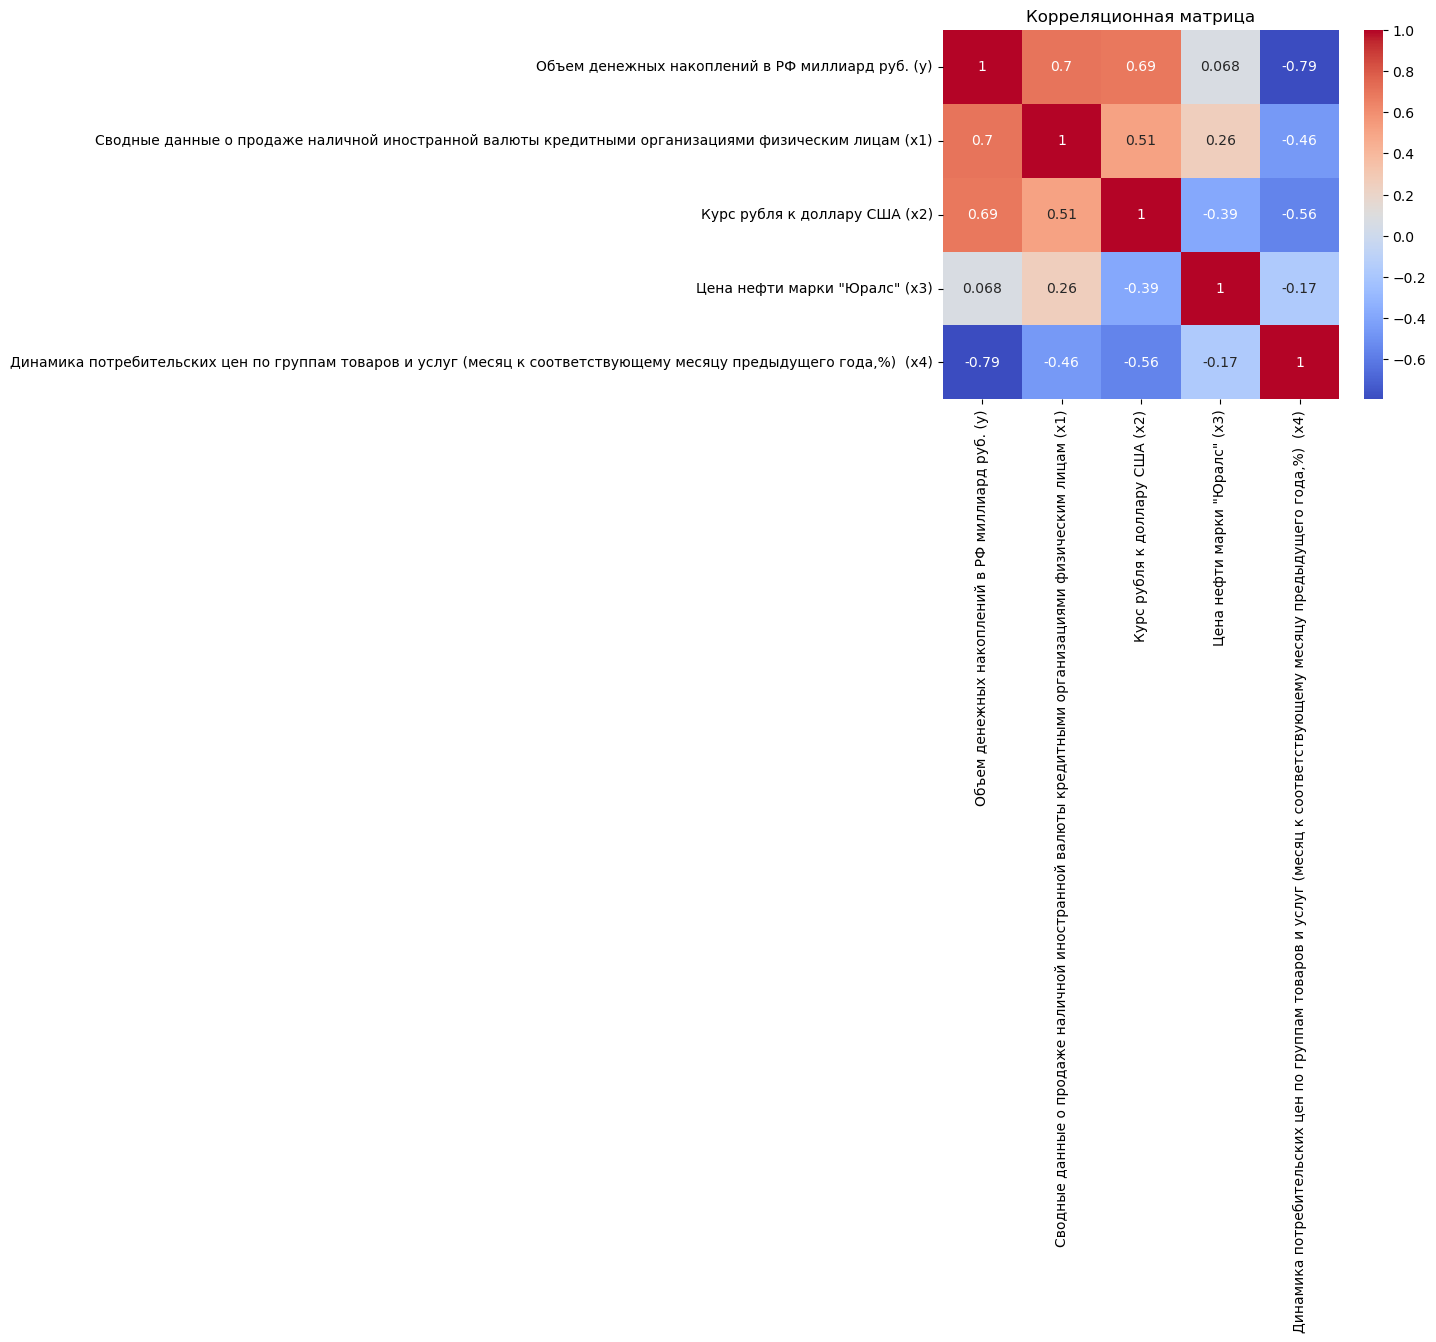

In [17]:
sns.heatmap(df.iloc[:,2:].corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

In [18]:
def check_relations(data):
    corr_matrix = data.corr()
    names = corr_matrix.index.values
    n = corr_matrix.shape[0]
    col = 1
    for i in range(1, n):
        row = 0
        for r in corr_matrix.iloc[:i, col]:
            ans = ''
            if r > 0:
                ans += 'ПРЯМАЯ '
            elif r < 0:
                ans += 'ОБРАТНАЯ '
                
            if abs(r) == 0:
                ans += 'НЕ НАБЛЮДАЕТСЯ '
            elif abs(r) < 0.3:
                ans += 'ОЧЕНЬ СЛАБАЯ '
            elif 0.3 <= abs(r) < 0.5:
                ans += 'СЛАБАЯ'
            elif 0.5 <= abs(r) < 0.7:
                ans += 'УМЕРЕННАЯ '
            elif 0.7 <= abs(r) < 1:
                ans += 'СИЛЬНАЯ '
            else:
                ans += 'ФУНКЦИОНАЛЬНАЯ '
            
            if st.ttest_rel(data.iloc[:, 0], data.iloc[:, col])[1] < 0.05:
                ans += f'(коэффициент корреляции {r:.3f} - статистически значим)'
            else:
                ans += f'(коэффициент корреляции {r:.3f} - статистически не значим)'
            print(f'Связь между {names[row]} и {names[col]} - {ans}\n')
            row += 1
        col += 1
check_relations(df.iloc[:, 2:])

Связь между Объем денежных накоплений в РФ миллиард руб. (y) и Сводные данные о продаже наличной иностранной валюты кредитными организациями физическим лицам (x1) - ПРЯМАЯ СИЛЬНАЯ (коэффициент корреляции 0.701 - статистически значим)

Связь между Объем денежных накоплений в РФ миллиард руб. (y) и Курс рубля к доллару США (x2) - ПРЯМАЯ УМЕРЕННАЯ (коэффициент корреляции 0.690 - статистически значим)

Связь между Сводные данные о продаже наличной иностранной валюты кредитными организациями физическим лицам (x1) и Курс рубля к доллару США (x2) - ПРЯМАЯ УМЕРЕННАЯ (коэффициент корреляции 0.510 - статистически значим)

Связь между Объем денежных накоплений в РФ миллиард руб. (y) и Цена нефти марки "Юралс" (x3) - ПРЯМАЯ ОЧЕНЬ СЛАБАЯ (коэффициент корреляции 0.068 - статистически значим)

Связь между Сводные данные о продаже наличной иностранной валюты кредитными организациями физическим лицам (x1) и Цена нефти марки "Юралс" (x3) - ПРЯМАЯ ОЧЕНЬ СЛАБАЯ (коэффициент корреляции 0.255 - статистическ